<a href="https://colab.research.google.com/github/jabir-al-nahian/bert/blob/main/news_classification_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
auth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nahian/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nahian/Fake-1K.csv")

In [ ]:
auth.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


# EDA

In [ ]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

### Compare Headline Length and Content Length

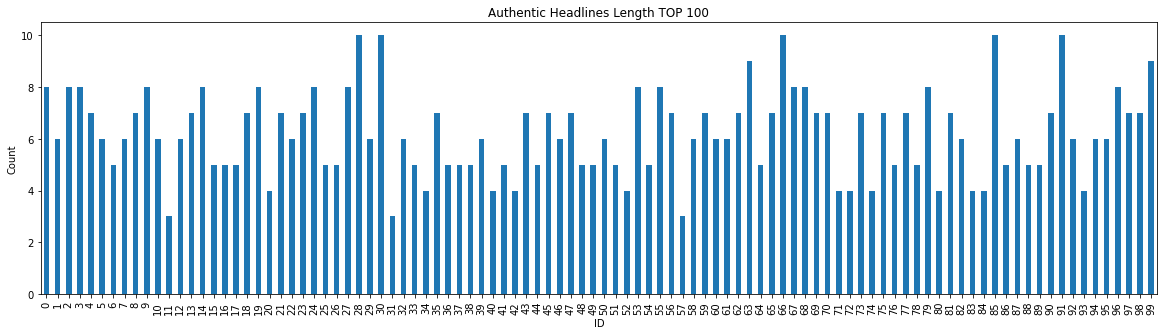

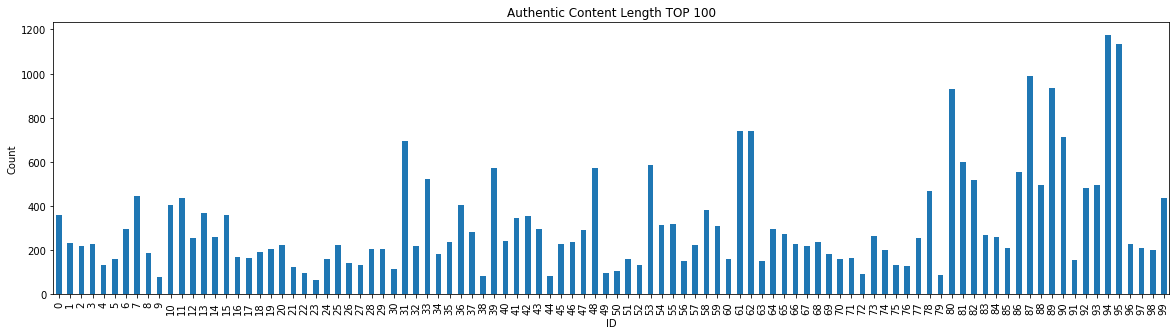

In [ ]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

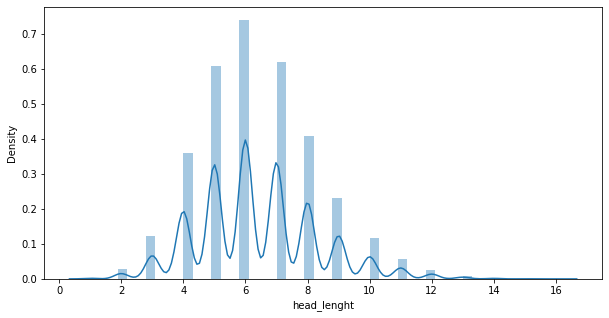

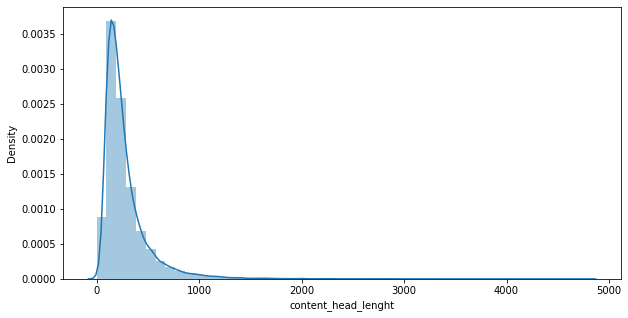

In [ ]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

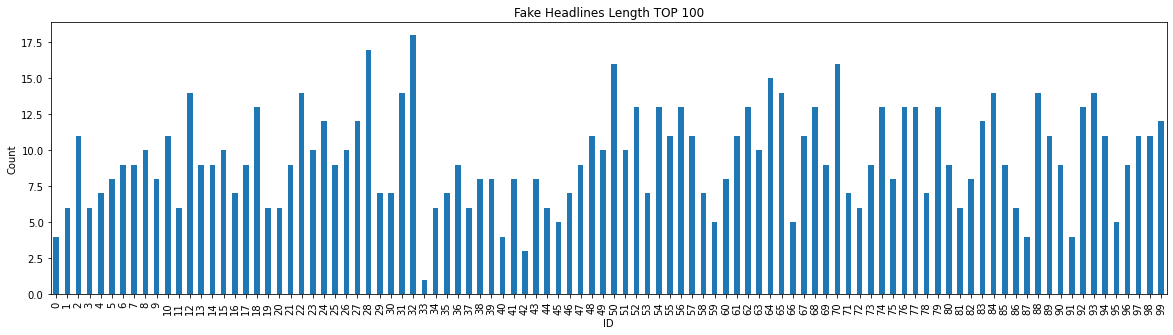

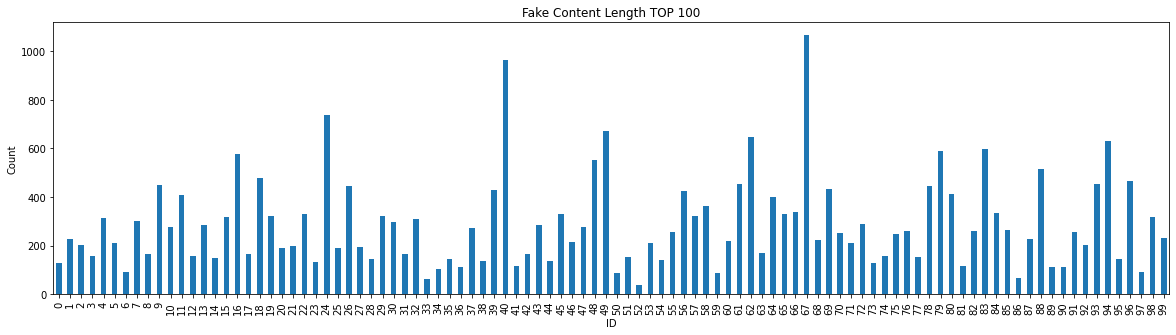

In [ ]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

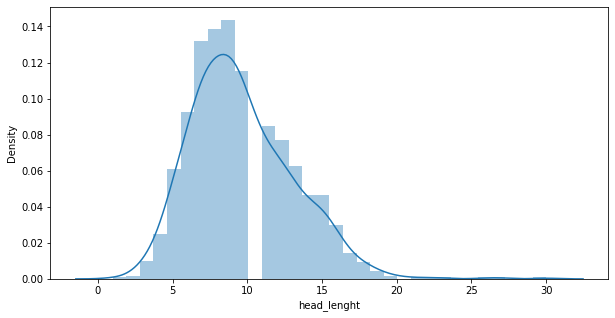

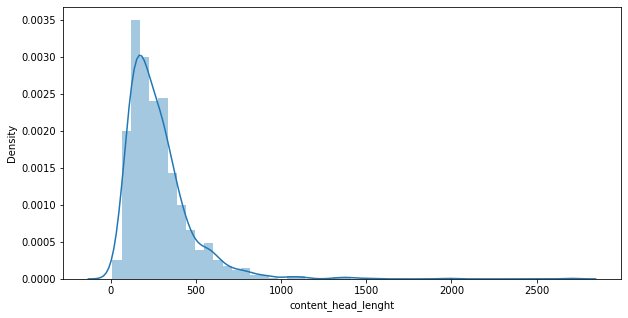

In [ ]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

## Word Cloud

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2022-07-26 11:11:17--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 172.67.165.83, 104.21.11.66, 2606:4700:3037::6815:b42, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|172.67.165.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.08s   

2022-07-26 11:11:18 (3.85 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    font_path="/content/Nikosh.ttf",
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

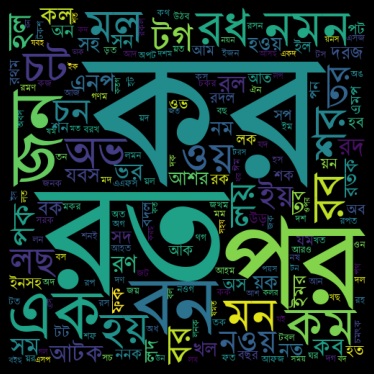

In [ ]:
s= " ".join(auth.headline[:100])
plot_world(s)

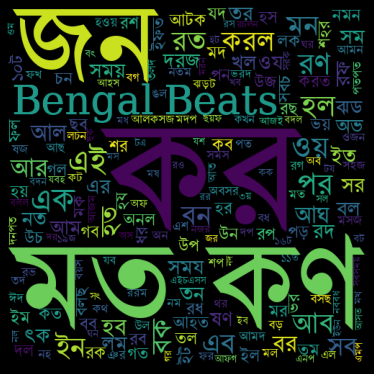

In [ ]:
s= " ".join(fake.headline[:100])
plot_world(s)

# Analysis Words

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.0 MB/s 
     |████████████████████████████████| 965 kB 40.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমার সোনার বাংলা
আমি তোমায় ভালবাসি
"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমার', 'সোনার', 'বাংলা', 'আমি', 'তোমায়', 'ভালবাসি']


In [ ]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [ ]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7482
Total auth tokens in 1000 10525


In [ ]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


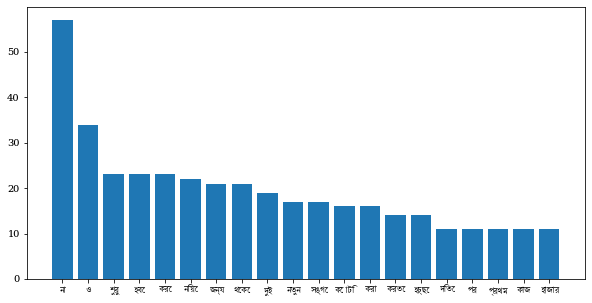

In [ ]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


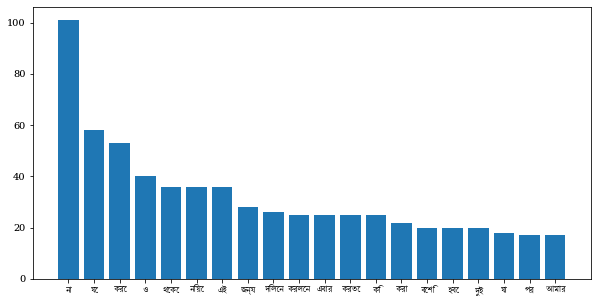

In [ ]:
show_stop_words(fake_corpus)

In [ ]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [ ]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [ ]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [ ]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)


In [ ]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


# Classify News

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 24.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 596 kB 63.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

# Prepare Datasets
- Dataset Info: Datasets contain `48678` authentic news and `1299` fake news. For this experiment, instead of all authentic news, only 5 times of fake news was used.
- And only consider the first 100 words (including headline and content)

- On datasets: Both headline and content of news were used. And manually a separator was added also `[SEP]`.

> BERT model is designed in such a way that the sentence has to start with the [CLS] token and end with the [SEP] token.
If we want to make separation of two sentences we can use [SEP] between sentences

### Train and Test split:
(only 20% data used for testing)
- Total Dataset size: 10392
- Total train size: 8313
- Test train size: 2079

In [ ]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [ ]:
auth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nahian/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nahian/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10392

In [ ]:
df

,articleID,domain,date,category,headline,content,label
0,6970,bd24live.com,2018-09-22 11:15:41,Sports,এশিয়া কাপে অংশ নিতে হঠাৎ দুবাই যাচ্ছেন তারা? ২...,ড্রেসিংরুম থেকেই জরুরি তলব ঢাকায়-ওপেনিংয়ে কিছু...,1
1,904,prothomalo.com,2018-09-19 19:01:48,International,হাইড্রোজেনে চলছে ট্রেন,বিশ্বের প্রথম হাইড্রোজেন ইঞ্জিনচালিত পরিবেশবান...,1
2,8423,risingbd.com,2018-09-22 16:45:10,Sports,ঘরের ক্রিকেটে ফিরে স্বরূপে ওয়ার্নার ও স্মিথ,ক্রীড়া ডেস্ক: বল টেম্পারিং কেলেঙ্কারির ঘটনার প...,1
3,5205,dhakatimes24.com,2018-09-21 10:46:50,Sports,ক্লান্ত মাশরাফিদের সামনে সতেজ ভারত,আইসিসি ক্রিকেটের বিশ্বায়ন চায়। অনেক দিন ধরে ত...,1
4,4731,bangla.bdnews24.com,2018-09-21 11:49:23,National,কৃষি বিশ্ববিদ্যালয় কর্মচারীদের কর্মসূচি প্রত্য...,দুপক্ষের আলোচনার পর বৃহস্পতিবার রাত পৌনে ১২টার...,1
...,...,...,...,...,...,...,...
10387,11225,jagonews24.com,2018-09-23 16:00:46,National,তাদের কান্নায় কাঁদলেন সবাই,‘গুরুজনে কর নতি’ স্লোগানকে বুকে ধারণ করে গোপাল...,1
10388,1596,ittefaq.com.bd,2018-09-20 01:13:43,National,বগুড়ায় মাদকদ্রব্যসহ গ্রেপ্তার ৬,বগুড়ায় বিপুল পরিমাণ মাদকদ্রব্যসহ ৬ ব্যবসায়ী গ্...,1
10389,837,banglanews24.com,2018-09-20 00:07:30,Entertainment,‘খোদাবক্স’ হাজির!,প্রথমবার একই সিনেমায় দেখা যাবে বলিউডের কিংবদন্...,1
10390,3784,banglanews24.com,2018-09-21 07:51:12,Sports,"অভিষিক্তি শান্ত-আবু হায়দার, তিন বছর পর মুমিনুল",ঢাকা: এশিয়া কাপে আফগানিস্তানের বিপক্ষে গ্রুপ প...,1


In [ ]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue

        if i in punctuations + '‘' + '’':
            continue

        filtered.append(i)

    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
বিশ্বের প্রথম হাইড্রোজেন ইঞ্জিনচালিত পরিবেশবান্ধব ট্রেন চালু হলো জার্মানিতে। ফ্রান্সের দ্রুতগতির ট্রেন নির্মাতা প্রতিষ্ঠান অ্যালস্টোম এই হাইড্রোজন ট্রেন বানিয়েছে। নীল রঙের এই ট্রেনের নাম কোরাডিয়া ইলিন্ট ট্রেন। গতকাল সোমবার জার্মানিতে প্রথম সেবা দিতে শুরু করে দুটো ট্রেন। হাইড্রোজেন ট্রেন প্রথম ছাড়া হয় জার্মানির লোয়ার সেক্সন রাজ্যের ব্রেমেরফুর্দে স্টেশন থেকে। জার্মানির কুক্সহ্যাভেন, ব্রেমারহেভেন, ব্রেমারভার্দে ও বুক্সেহুডে চলাচল করবে ট্রেন দুটি। জার্মানির কুক্সহেভেন ও বুক্সতেহুদে শহরের মধ্যে ১০০ কিলোমিটার রেলপথে চলাচলকারী ট্রেনগুলোর ডিজেল ইঞ্জিন সরিয়ে হাইড্রোজেন ইঞ্জিন জুড়ে দেওয়া হয়। আগামী ২০২১ সালের মধ্যে আরও ১৪টি হাইড্রোজেন ইঞ্জিন যোগ করার পরিকল্পনা রয়েছে দেশটির। অ্যালস্টোমের পক্ষ থেকে বলা হয়েছে, একটি হাইড্রোজেন ট্যাংক ট্রেনের সঙ্গে থাকবে আর এর ছাদে থাকবে জ্বালানি কোষ। অক্সিজেন ও হাইড্রোজেনের সংমিশ্রণ ঘটিয়ে শক্তি উৎপাদন করবে। অতিরিক্ত জ্বালানি সংরক্ষণ করা হবে ব্যাটারিতে। একবার জ্বালানি নিয়ে ট্রেনটি এক হাজার কিলোমিটার চলতে পারবে। বিশ্বের প্রথম এই হাইড্র

In [ ]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [ ]:
len(train_df), len(test_df)

(8313, 2079)

In [ ]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [ ]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Define Model
 `Bert` stands for Bidirectional Encoder Representations from Transformers used in this experiment with two additional `Fully Connected` Layers.

 For this experiment, [Bangla Bert](https://huggingface.co/sagorsarker/bangla-bert-base) pretrained model was used.

#### FC layers
- First Linear Layer: IO(768 -> 128)
- Second Linear Layer: IO(128 -> 2)

#### Additionals
- Activation Fuction: Relu
- Dropout: 20%
- Optimizer: AdamW
- Loss: CrossEntropyLoss
- Scheduler: StepLR

In [ ]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))

        return x

In [ ]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/630M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

In [ ]:
# for param in bert.parameters():
#     param.requires_grad = False

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [ ]:
s = "আমার সোনার বাংলা। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2211,  2118, 42834,  2492,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[-0.0381,  0.0182]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Lets Train

In [ ]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [ ]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [ ]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [ ]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/nahian/news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.243698.. 	Valid Loss:0.154471.. 	Accuracy: 94.8052
Epoch: 2/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.145718.. 	Valid Loss:0.207700.. 	Accuracy: 95.3343
Epoch: 3/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.076249.. 	Valid Loss:0.164912.. 	Accuracy: 96.2963
Epoch: 4/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.069493.. 	Valid Loss:0.182469.. 	Accuracy: 96.2963
Epoch: 5/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.058103.. 	Valid Loss:0.173596.. 	Accuracy: 96.2963
Training completed in 20m 34s


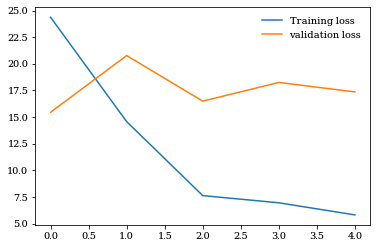

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

# Testing
To test this model, the left 15% data was used.

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/nahian/news_model1.pth", map_location = device))

<All keys matched successfully>

In [ ]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       260
           1       0.96      0.98      0.97      1819

    accuracy                           0.95      2079
   macro avg       0.90      0.85      0.87      2079
weighted avg       0.95      0.95      0.95      2079

